<img src="airplane_landing.jpg">

<h1 align="center">An analysis of aircraft crashes from 1908 to 2009</h1>

Source: https://data.world/data-society/airplane-crashes

The dataset lists a large proportion of notable aircraft crashes/incidents. It provides details of each incident, with date and time, basic aircraft details such as type and registration, and the counts of people involved in it. 

Through the use of OpenStreetMap's Nominatim API, approximate coordinate data was also generated, allowing for analysis of crash locations worldwide.

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from datetime import datetime

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 7)
saved_style_state = matplotlib.rcParams.copy()

aircraft_crashes = pd.read_csv("aircraft_crashes.csv", parse_dates=[0])

In [49]:
aircraft_crashes.head(4)

,date,time,location,operator,flight_number,route,type,registration,id,aboard,fatalities,ground_fatalities,latitude,longitude,summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,38.877461,-77.080828,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,NaN,NaN,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,48.428318,-123.364953,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,56.741234,2.891172,The airship flew into a thunderstorm and encou...


<img src="divider1.png">

Text(0, 0.5, 'Frequency')

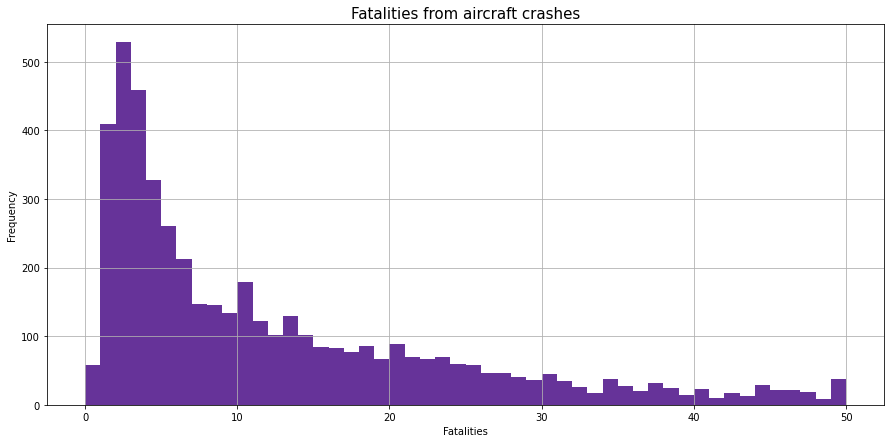

In [50]:
aircraft_crashes.fatalities[aircraft_crashes.fatalities <= 50].hist(bins=50, color='rebeccapurple')
plt.title("Fatalities from aircraft crashes", fontsize=15)
plt.xlabel('Fatalities', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

Text(0, 0.5, 'Frequency')

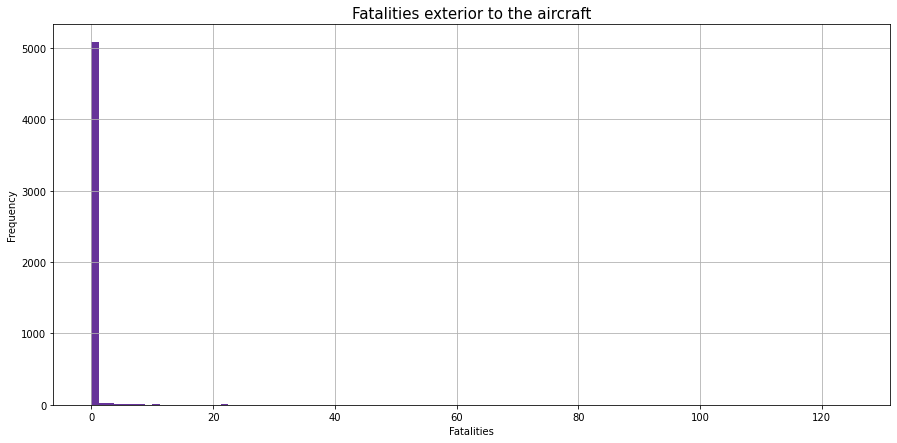

In [51]:
aircraft_crashes.ground_fatalities[aircraft_crashes.ground_fatalities < 200].hist(bins=100, color='rebeccapurple')
plt.title("Fatalities exterior to the aircraft", fontsize=15)
plt.xlabel('Fatalities', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

Text(0, 0.5, 'Frequency')

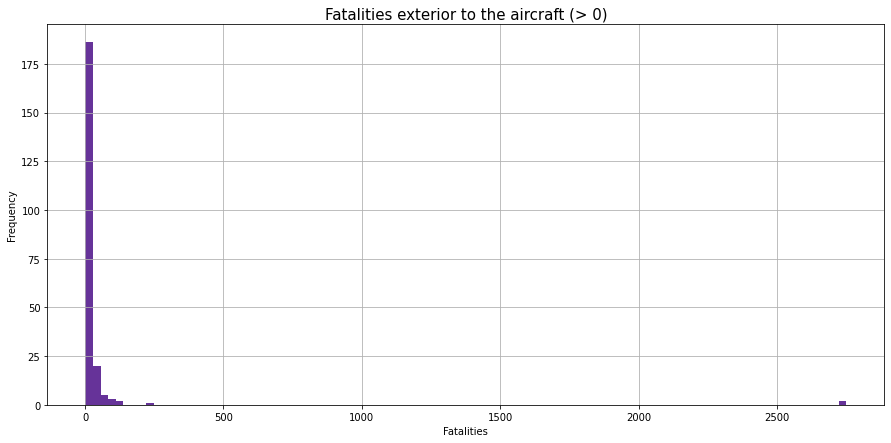

In [52]:
aircraft_crashes.ground_fatalities[aircraft_crashes.ground_fatalities > 0].hist(bins=100, color='rebeccapurple')
plt.title("Fatalities exterior to the aircraft (> 0)", fontsize=15)
plt.xlabel('Fatalities', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

Text(0, 0.5, 'Fatalities')

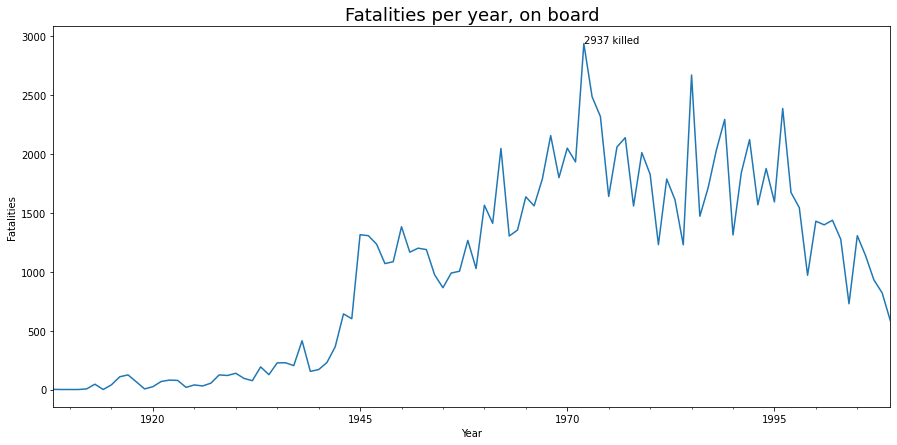

In [53]:
crashes_grouped_by_y = aircraft_crashes.set_index('date').groupby(pd.Grouper(freq='1Y')).sum()
crashes_grouped_by_y.fatalities.plot()

date = crashes_grouped_by_y.fatalities.idxmax()
killed = int(crashes_grouped_by_y.fatalities.loc[date])
plt.annotate(f"{killed} killed", (date, killed))

plt.title("Fatalities per year, on board", fontsize=18)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)

Text(0, 0.5, 'Fatalities')

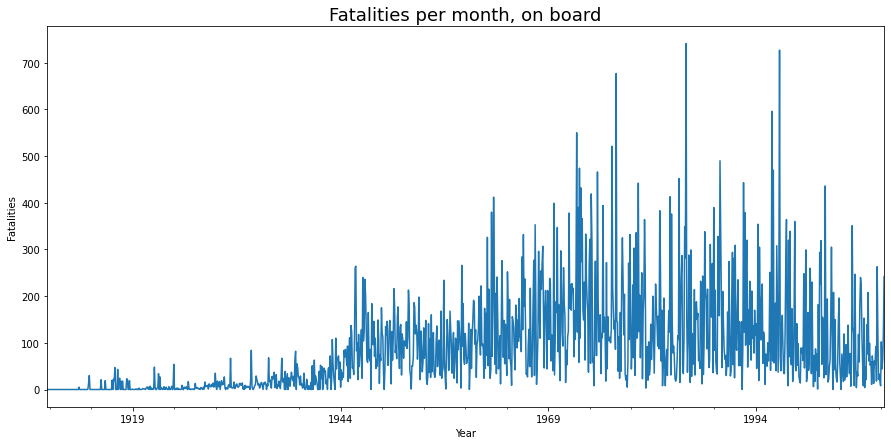

In [54]:
crashes_grouped_by_m = aircraft_crashes.set_index('date').groupby(pd.Grouper(freq='1M')).sum()
crashes_grouped_by_m.fatalities.plot()

plt.title("Fatalities per month, on board", fontsize=18)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)

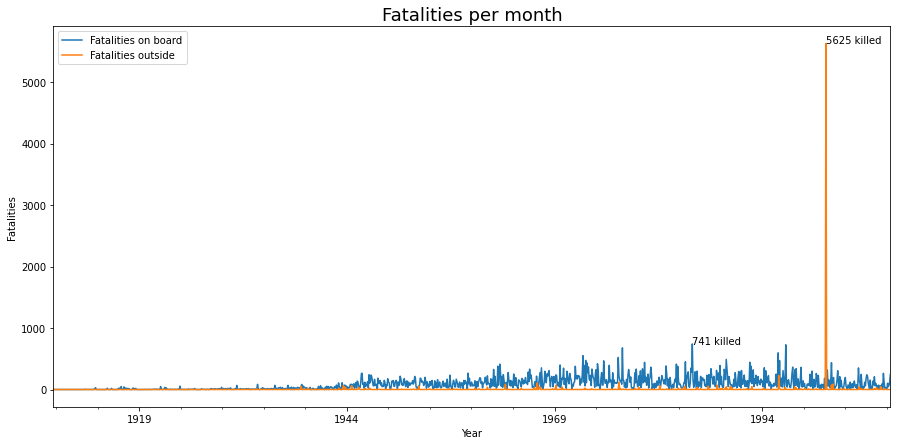

In [55]:
fatalities_by_m = aircraft_crashes.set_index('date').groupby(pd.Grouper(freq='1M')).sum().fatalities
fatalities_by_m.plot()
ground_fatalities_by_m = aircraft_crashes.set_index('date').groupby(pd.Grouper(freq='1M')).sum().ground_fatalities
ground_fatalities_by_m.plot()

date = ground_fatalities_by_m.idxmax()
killed = int(ground_fatalities_by_m.loc[date])
plt.annotate(f"{killed} killed", (date, killed))

date = fatalities_by_m.idxmax()
killed = int(fatalities_by_m.loc[date])
plt.annotate(f"{killed} killed", (date, killed))

plt.title("Fatalities per month", fontsize=18)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)
plt.legend(['Fatalities on board', 'Fatalities outside'])

In [56]:
print('Most exterior fatalities in a single crash:', int(aircraft_crashes.ground_fatalities.max()))

aircraft_crashes.loc[aircraft_crashes.ground_fatalities.idxmax()]

Most exterior fatalities in a single crash: 2750


date                                               2001-09-11 00:00:00
time                                                              8:47
location                                       New York City, New York
operator                                             American Airlines
flight_number                                                       11
route                                             Boston - Los Angeles
type                                                  Boeing 767-223ER
registration                                                    N334AA
id                                                           22332/169
aboard                                                            92.0
fatalities                                                        92.0
ground_fatalities                                               2750.0
latitude                                                     40.712728
longitude                                                   -74.006015
summar

<img src="divider1.png">

Text(0, 0.5, 'Latitude')

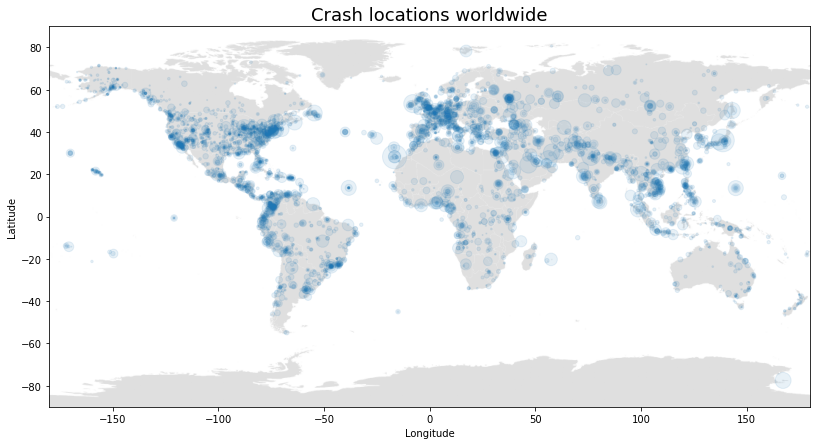

In [57]:
plt.scatter(x=aircraft_crashes.longitude, y=aircraft_crashes.latitude, s=aircraft_crashes.fatalities, alpha=0.1)

plt.imshow(X=plt.imread('world_map.png'), extent=[-180, 180, -90, 90])

plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.title("Crash locations worldwide", fontsize=18)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)

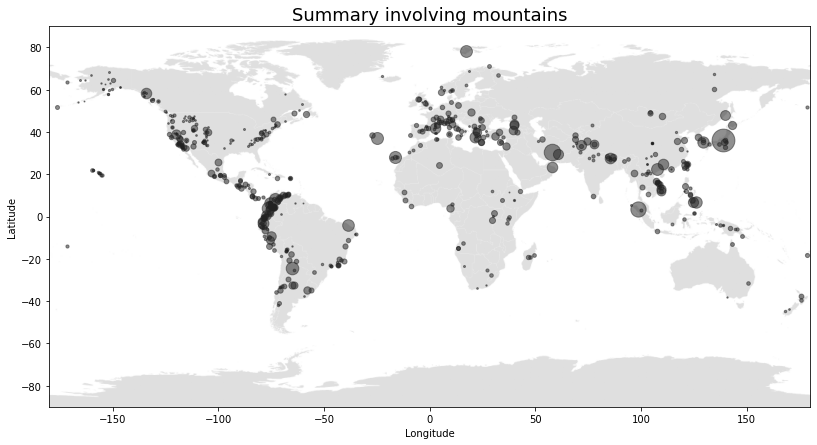

In [58]:
for i in aircraft_crashes.index:
    description = str(aircraft_crashes.summary[i]).lower()
    if description.find('mountain') != -1:
        plt.scatter(x=aircraft_crashes.longitude[i], y=aircraft_crashes.latitude[i], s=aircraft_crashes.fatalities[i], c='#222222', alpha=0.5)

plt.imshow(X=plt.imread('world_map.png'), extent=[-180, 180, -90, 90])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title("Summary involving mountains", fontsize=18)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()

Text(0, 0.5, 'Latitude')

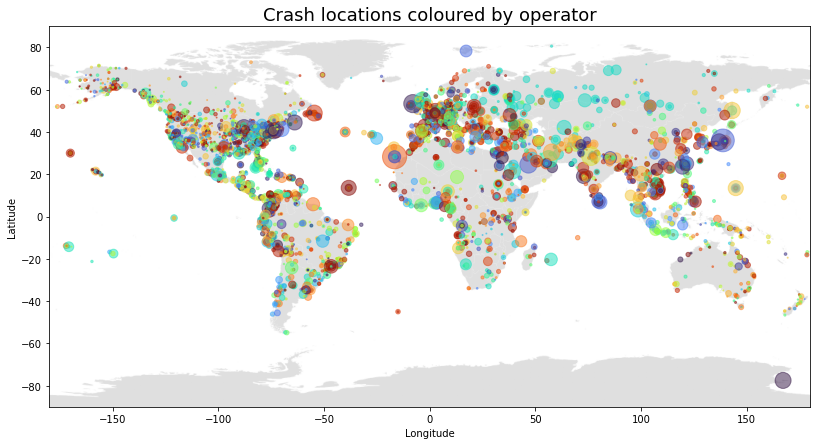

In [59]:
operator_colors = {}
colors = []
for i in aircraft_crashes.operator:
    if i not in operator_colors:
        operator_colors[i] = random.random()
    val = operator_colors[i]
    colors.append(val)

plt.scatter(x=aircraft_crashes.longitude, y=aircraft_crashes.latitude, s=aircraft_crashes.fatalities, alpha=0.5, c=colors, cmap='turbo')

plt.imshow(X=plt.imread('world_map.png'), extent=[-180, 180, -90, 90])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title("Crash locations coloured by operator", fontsize=18)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)

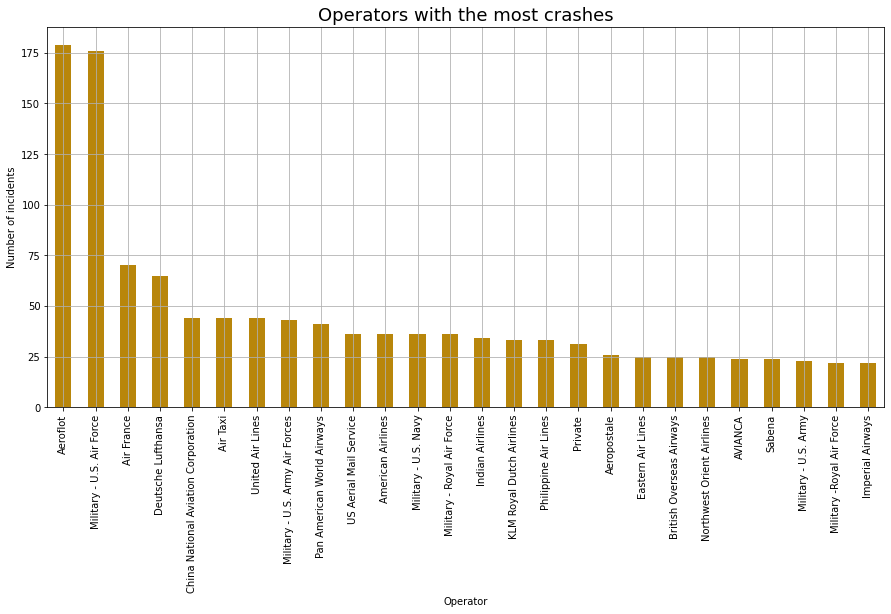

In [60]:
operator = aircraft_crashes['operator'].value_counts()
operator[operator >= 20].plot(kind='bar', color='darkgoldenrod')
plt.title("Operators with the most crashes", fontsize=18)
plt.xlabel('Operator', fontsize=10)
plt.ylabel('Number of incidents', fontsize=10)
plt.grid(True)

Note: Air Taxi does not refer to a single operator, but rather, a service provided by many different companies.

Text(0, 0.5, 'Latitude')

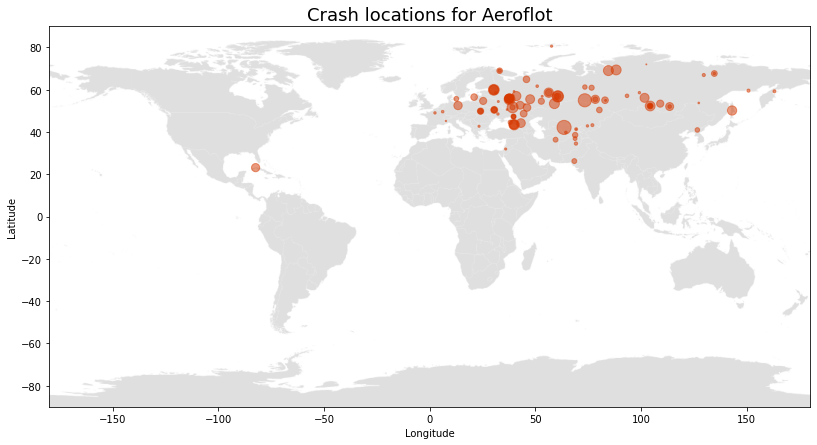

In [61]:
target = 'Aeroflot'

plt.scatter(x=aircraft_crashes.longitude[aircraft_crashes.operator == target], y=aircraft_crashes.latitude[aircraft_crashes.operator == target], s=aircraft_crashes.fatalities[aircraft_crashes.operator == target], c='#D63900', alpha=0.5)

plt.imshow(X=plt.imread('world_map.png'), extent=[-180, 180, -90, 90])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title(f"Crash locations for {target}", fontsize=18)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)

In [62]:
for index, row in aircraft_crashes.iterrows():
    if str(row.operator).lower() == 'aeroflot':
        if row.longitude < -50:
            print(row)

date                                               1977-05-27 00:00:00
time                                                               NaN
location                                                  Havana, Cuba
operator                                                      Aeroflot
flight_number                                                      NaN
route                                                              NaN
type                                                   Ilyushin IL-62M
registration                                                CCCP-86614
id                                                               51903
aboard                                                            70.0
fatalities                                                        68.0
ground_fatalities                                                  1.0
latitude                                                     23.135305
longitude                                                   -82.358963
summar

Text(0, 0.5, 'Latitude')

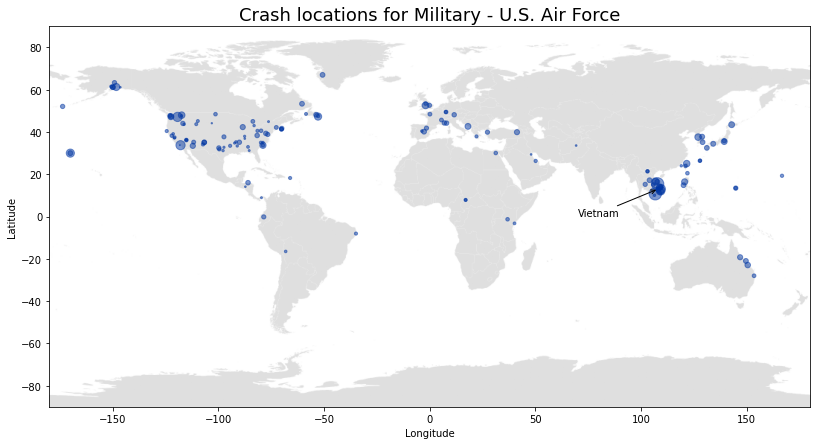

In [63]:
target = 'Military - U.S. Air Force'

plt.scatter(x=aircraft_crashes.longitude[aircraft_crashes.operator == target], y=aircraft_crashes.latitude[aircraft_crashes.operator == target], s=aircraft_crashes.fatalities[aircraft_crashes.operator == target], c='#0036A3', alpha=0.5)

plt.annotate('Vietnam', xy=[108, 13], xytext=[70, 0], arrowprops={'arrowstyle': '->'})

plt.imshow(X=plt.imread('world_map.png'), extent=[-180, 180, -90, 90])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title(f"Crash locations for {target}", fontsize=18)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)

Text(0, 0.5, 'Latitude')

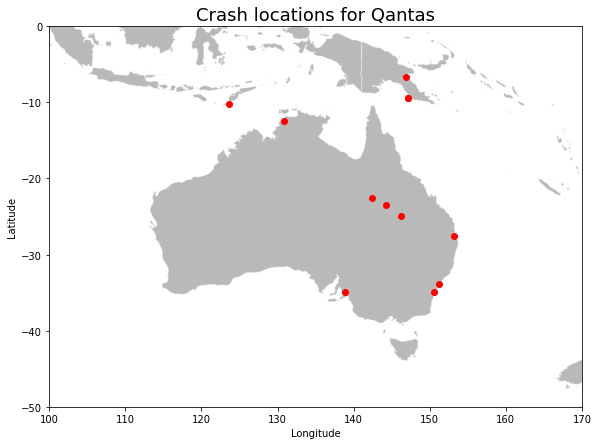

In [64]:
target = 'Qantas'

plt.scatter(x=aircraft_crashes.longitude[aircraft_crashes.operator == target], y=aircraft_crashes.latitude[aircraft_crashes.operator == target], c='red')

plt.imshow(X=plt.imread('australia.png'), extent=[100, 170, -50, 0])
plt.xlim(100, 170)
plt.ylim(-50, 0)
plt.title(f"Crash locations for {target}", fontsize=18)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)

Text(0, 0.5, 'Fatalities')

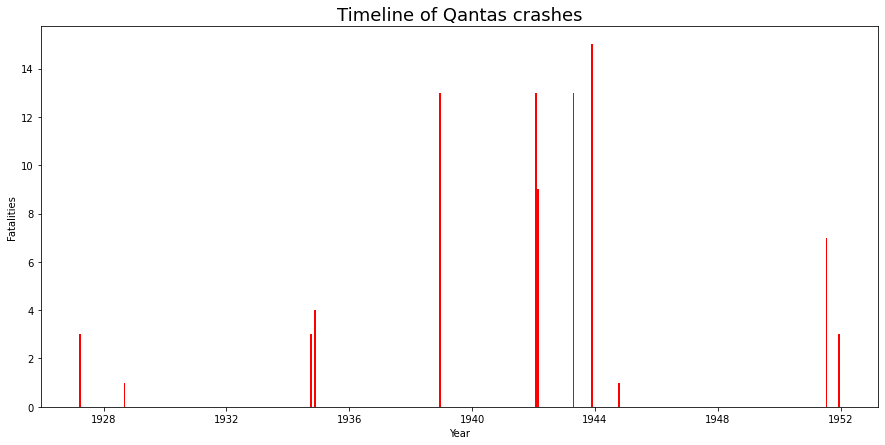

In [65]:
plt.bar(x=aircraft_crashes.date[aircraft_crashes.operator == 'Qantas'], height=aircraft_crashes.fatalities[aircraft_crashes.operator == 'Qantas'], width=20, color='red')

plt.title("Timeline of Qantas crashes", fontsize=18)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)

<img src="divider1.png">

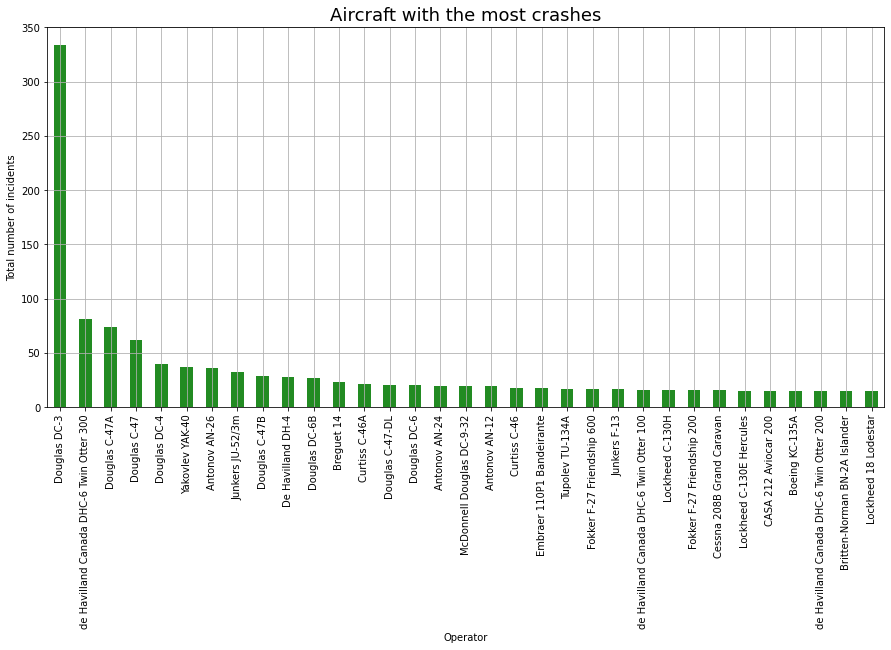

In [66]:
operator = aircraft_crashes['type'].value_counts()
operator[operator >= 15].plot(kind='bar', color='forestgreen')
plt.title("Aircraft with the most crashes", fontsize=18)
plt.xlabel('Operator', fontsize=10)
plt.ylabel('Total number of incidents', fontsize=10)
plt.grid(True)

The DC-3 happens to involve the most incidents. It is quite an old airplane (introduced 85 years ago!) which makes sense why this is the case - the combination of a long time in service and less advanced/tested technology.

<img src="dc3.jpg">

<center>Image credit: "restored Douglas DC-3 in flight" by Towpilot. CC BY-SA 3.0</center>

Text(0, 0.5, 'Latitude')

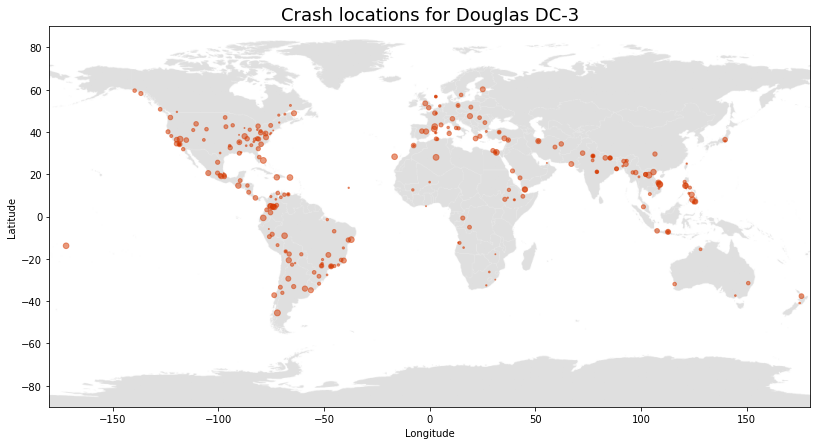

In [67]:
target = 'Douglas DC-3'

plt.scatter(x=aircraft_crashes.longitude[aircraft_crashes.type == target], y=aircraft_crashes.latitude[aircraft_crashes.type == target], s=aircraft_crashes.fatalities[aircraft_crashes.type == target], c='#D63900', alpha=0.5)

plt.imshow(X=plt.imread('world_map.png'), extent=[-180, 180, -90, 90])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title(f"Crash locations for {target}", fontsize=18)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)

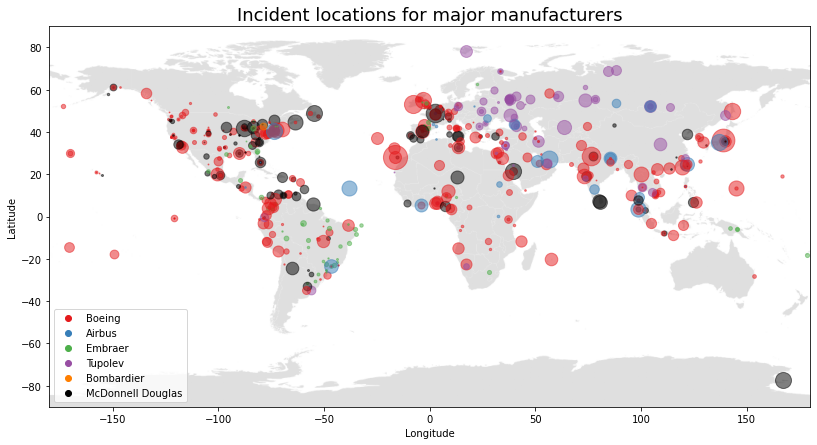

In [68]:
for i in aircraft_crashes.index:
    description = str(aircraft_crashes.type[i]).lower()
    if description.find('boeing') != -1:
        plt.scatter(x=aircraft_crashes.longitude[i], y=aircraft_crashes.latitude[i], s=aircraft_crashes.fatalities[i], c='#E41A1C', alpha=0.5)
    elif description.find('airbus') != -1:
        plt.scatter(x=aircraft_crashes.longitude[i], y=aircraft_crashes.latitude[i], s=aircraft_crashes.fatalities[i], c='#377EB8', alpha=0.5)
    elif description.find('embraer') != -1:
        plt.scatter(x=aircraft_crashes.longitude[i], y=aircraft_crashes.latitude[i], s=aircraft_crashes.fatalities[i], c='#4DAF4A', alpha=0.5)
    elif description.find('tupolev') != -1:
        plt.scatter(x=aircraft_crashes.longitude[i], y=aircraft_crashes.latitude[i], s=aircraft_crashes.fatalities[i], c='#984EA3', alpha=0.5)
    elif description.find('bombardier') != -1:
        plt.scatter(x=aircraft_crashes.longitude[i], y=aircraft_crashes.latitude[i], s=aircraft_crashes.fatalities[i], c='#FF7F00', alpha=0.5)
    elif description.find('mcdonnell') != -1:
        plt.scatter(x=aircraft_crashes.longitude[i], y=aircraft_crashes.latitude[i], s=aircraft_crashes.fatalities[i], c='#000000', alpha=0.5)

plt.scatter(0, 100, c='#E41A1C', label='Boeing')
plt.scatter(0, 100, c='#377EB8', label='Airbus')
plt.scatter(0, 100, c='#4DAF4A', label='Embraer')
plt.scatter(0, 100, c='#984EA3', label='Tupolev')
plt.scatter(0, 100, c='#FF7F00', label='Bombardier')
plt.scatter(0, 100, c='#000000', label='McDonnell Douglas')
plt.legend()
plt.imshow(X=plt.imread('world_map.png'), extent=[-180, 180, -90, 90])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title("Incident locations for major manufacturers", fontsize=18)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()

<img src="airport.jpg">
Martin Ibbett